In [1]:
import pandas as pd
#read in the data using pandas
df = pd.read_csv("D:\\project\\IST_corrected_preprocessed_all.csv")
#check data has been read in properly
df.head()

,SEX,AGE,RATRIAL,RVISI00,RASP3,RSBP,RDE01,RDE02,RDE03,RDE04,RDE05,RDE06,RDE07,RDE08,TARGET
0,1,1,1.0,0,0.0,-1,1,1,1,1,0,0,0,1,Coronary heart disease
1,1,1,0.0,1,0.0,-1,1,1,1,1,0,0,0,0,Coronary heart disease
2,1,1,0.0,0,1.0,-1,1,1,1,0,1,1,0,0,Coronary heart disease
3,0,1,0.0,1,0.0,-1,1,1,1,1,1,1,0,0,Coronary heart disease
4,1,1,0.0,0,0.0,-1,1,1,1,1,-1,-1,0,0,Coronary heart disease


In [2]:
#drop rows with null values
df = df.dropna()

In [3]:
#check for missing values
df.isnull().sum()

SEX        0
AGE        0
RATRIAL    0
RVISI00    0
RASP3      0
RSBP       0
RDE01      0
RDE02      0
RDE03      0
RDE04      0
RDE05      0
RDE06      0
RDE07      0
RDE08      0
TARGET     0
dtype: int64

In [4]:
newlabeldf=df['TARGET'].replace({ 'Alive': 0,'Initial stroke': 1, 'Reccurent ischaemic': 1 ,'Reccurent haemorrhagic stroke': 1, 'Pneumonia': 1, 'Coronary heart disease': 1, 'Pulmonary embolism': 1, 'Other vascular': 1,'Non vascular': 1})
df['TARGET'] = newlabeldf
#df['target'] = newlabeldf
print(df['TARGET'].head())

0    1
1    1
2    1
3    1
4    1
Name: TARGET, dtype: int64


In [5]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["TARGET"])
#check that the target variable has been removed
X.head()

,SEX,AGE,RATRIAL,RVISI00,RASP3,RSBP,RDE01,RDE02,RDE03,RDE04,RDE05,RDE06,RDE07,RDE08
0,1,1,1.0,0,0.0,-1,1,1,1,1,0,0,0,1
1,1,1,0.0,1,0.0,-1,1,1,1,1,0,0,0,0
2,1,1,0.0,0,1.0,-1,1,1,1,0,1,1,0,0
3,0,1,0.0,1,0.0,-1,1,1,1,1,1,1,0,0
4,1,1,0.0,0,0.0,-1,1,1,1,1,-1,-1,0,0


In [6]:
#separate target values
y = df["TARGET"].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [7]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [10]:
#Building and Training the model
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [12]:
y_pred_init = knn.predict(X_test)

In [13]:
#check accuracy of our model on the test data
knn.score(X_test,y_test)

0.9249525873746952

In [14]:
#k-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scoresmean:{}".format(np.mean(cv_scores)))

[0.93701321 0.93159499 0.93292683 0.9403592  0.93832599]
cv_scoresmean:0.936044043156938


In [15]:
#Hypertuning model parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 7}

In [17]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9382791327913279

In [8]:
#Building and Training the model_final using GridSearch parameters
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn_gscv_test = KNeighborsClassifier(n_neighbors = 7)
# Fit the classifier to the data
knn_gscv_test.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [9]:
knn_gscv_test.score(X_train, y_train)

0.9466124661246612

In [10]:
#show  predictions on the test data
y_pred_gscv = knn_gscv_test.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred_gscv)

0.9363316174478461

In [21]:
#Hypertuning model parameters using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
knn_rscv = RandomizedSearchCV(knn2, param_grid, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
knn_rscv.fit(X_train, y_train)
knn_rscv.best_params_

D:\Apps\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_neighbors': 7}

In [22]:
knn_rscv.best_score_

0.9382791327913279

In [23]:
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = np.arange(1, 25)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="n_neighbors", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

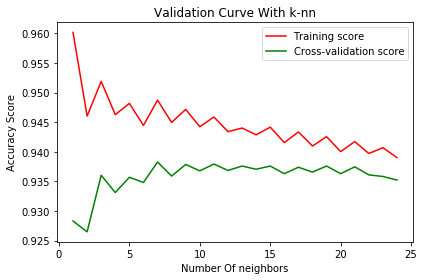

In [26]:
import matplotlib.pyplot as plt
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With k-nn")
plt.xlabel("Number Of neighbors")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

Confusion matrix, without normalization
[[2807   77]
 [ 158  649]]


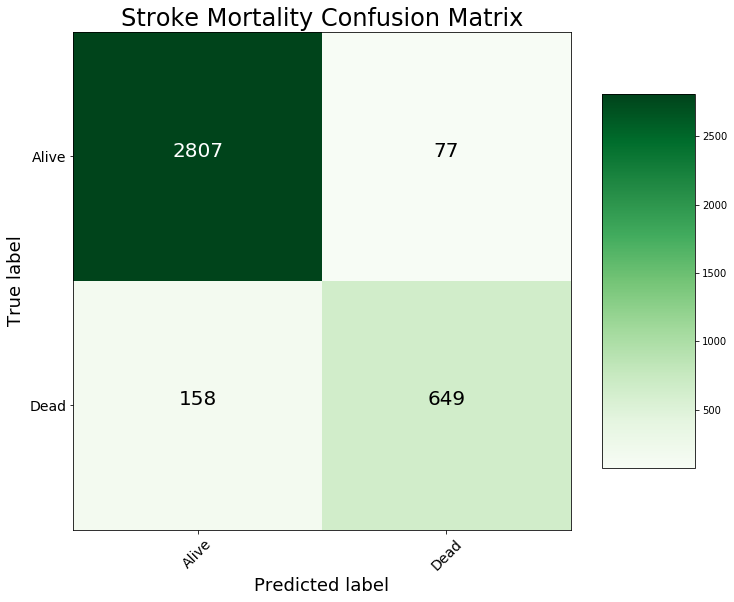

In [34]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(y_test, y_pred_gscv)
plot_confusion_matrix(cm, classes = ['Alive', 'Dead'],
                      title = 'Stroke Mortality Confusion Matrix')

In [31]:
confusion_matrix(y_test,y_pred_gscv)

array([[2807,   77],
       [ 158,  649]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gscv))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2884
           1       0.89      0.80      0.85       807

    accuracy                           0.94      3691
   macro avg       0.92      0.89      0.90      3691
weighted avg       0.94      0.94      0.94      3691



Kth Nearest Neighbor: ROC AUC=0.965


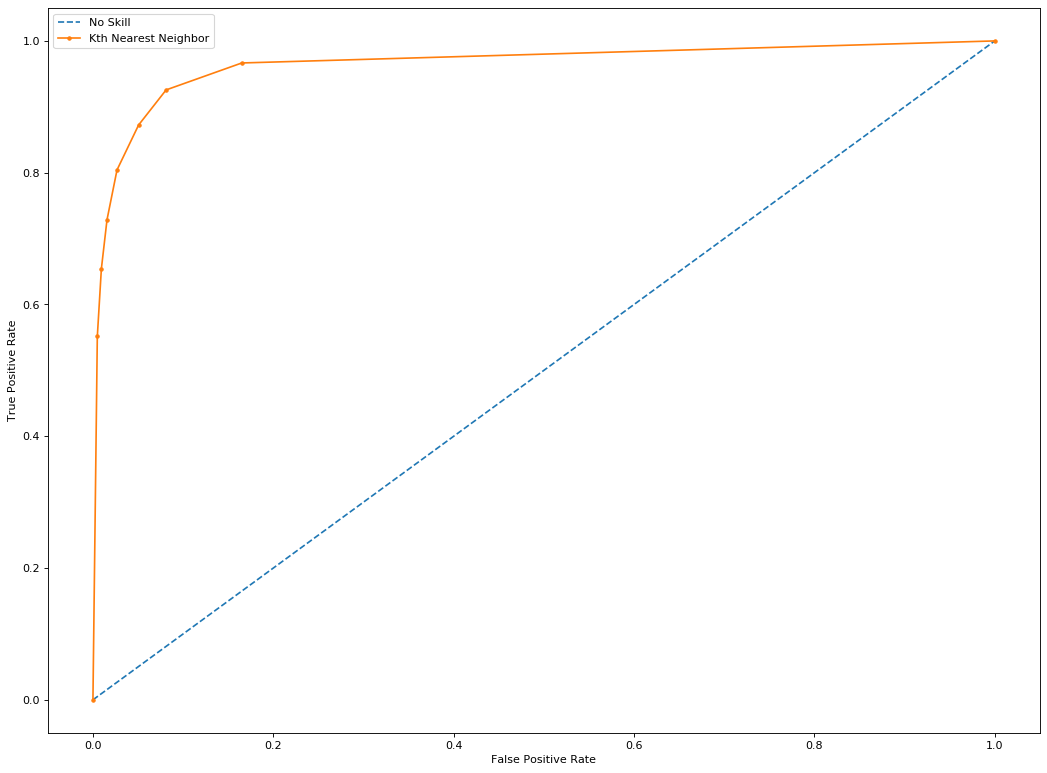

In [12]:
# roc curve and auc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
knn_probs = knn_gscv_test.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Kth Nearest Neighbor: ROC AUC=%.3f' % (knn_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='Kth Nearest Neighbor')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

kth Nearest Neighbors: f1=0.847 auc=0.924


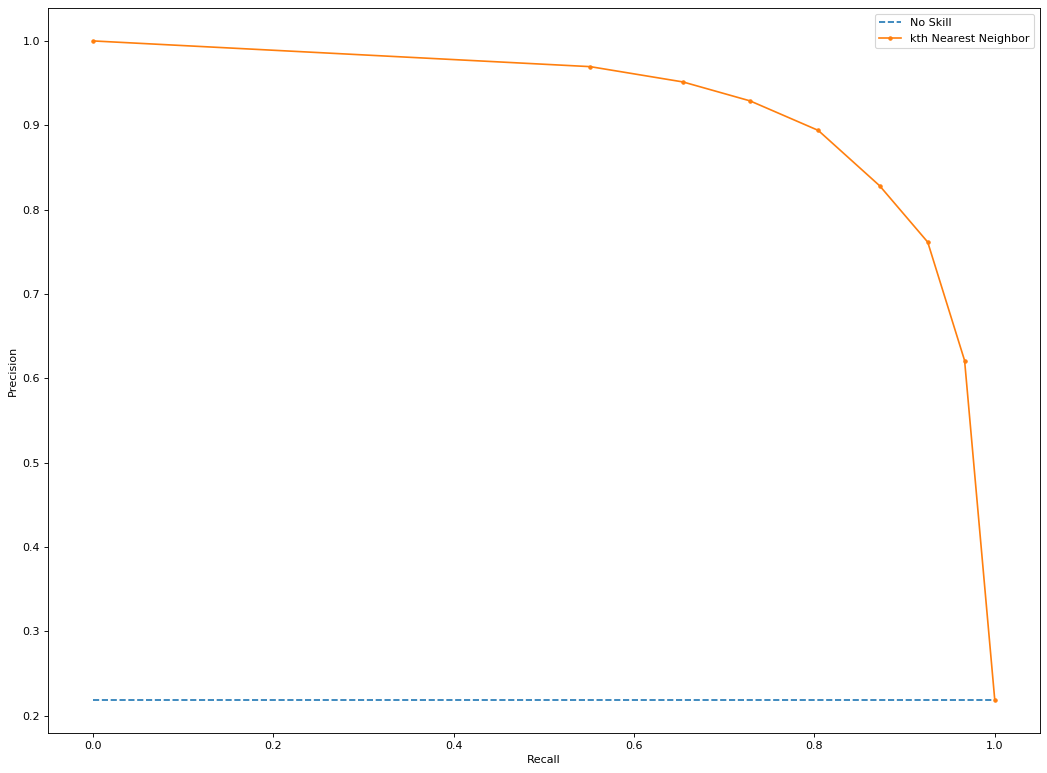

In [13]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
#precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, y_pred_gscv), auc(knn_recall, knn_precision)
# summarize scores
print('kth Nearest Neighbors: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(knn_recall, knn_precision, marker='.', label='kth Nearest Neighbor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train_scaled, y_train)
y_predF = modelF.predict(X_test_scaled)

D:\Apps\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predF)

0.9450013546464373

In [62]:
from sklearn.model_selection import GridSearchCV
#Using grid search
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 30.0min finished


In [64]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 300}

In [17]:
from sklearn.ensemble import RandomForestClassifier
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 300, min_samples_split = 15, min_samples_leaf = 2)
modelOpt = forestOpt.fit(X_train_scaled, y_train)
y_predrfc = modelOpt.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predrfc)

0.9501490111081008

In [78]:
#Hypertuning model parameters using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rfc_rscv = RandomizedSearchCV(forest, hyperF, n_iter=100, cv=5, verbose=0, n_jobs=-1)
rfc_rscv.fit(X_train_scaled, y_train)
rfc_rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_depth': 30}

In [79]:
rfc_rscv.best_score_

0.9523035230352304

In [80]:
forestOptRS = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 300, min_samples_split = 15, min_samples_leaf = 2)
modelOptRS = forestOpt.fit(X_train_scaled, y_train)
y_predrfcRS = modelOpt.predict(X_test_scaled)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predrfcRS)

0.9501490111081008

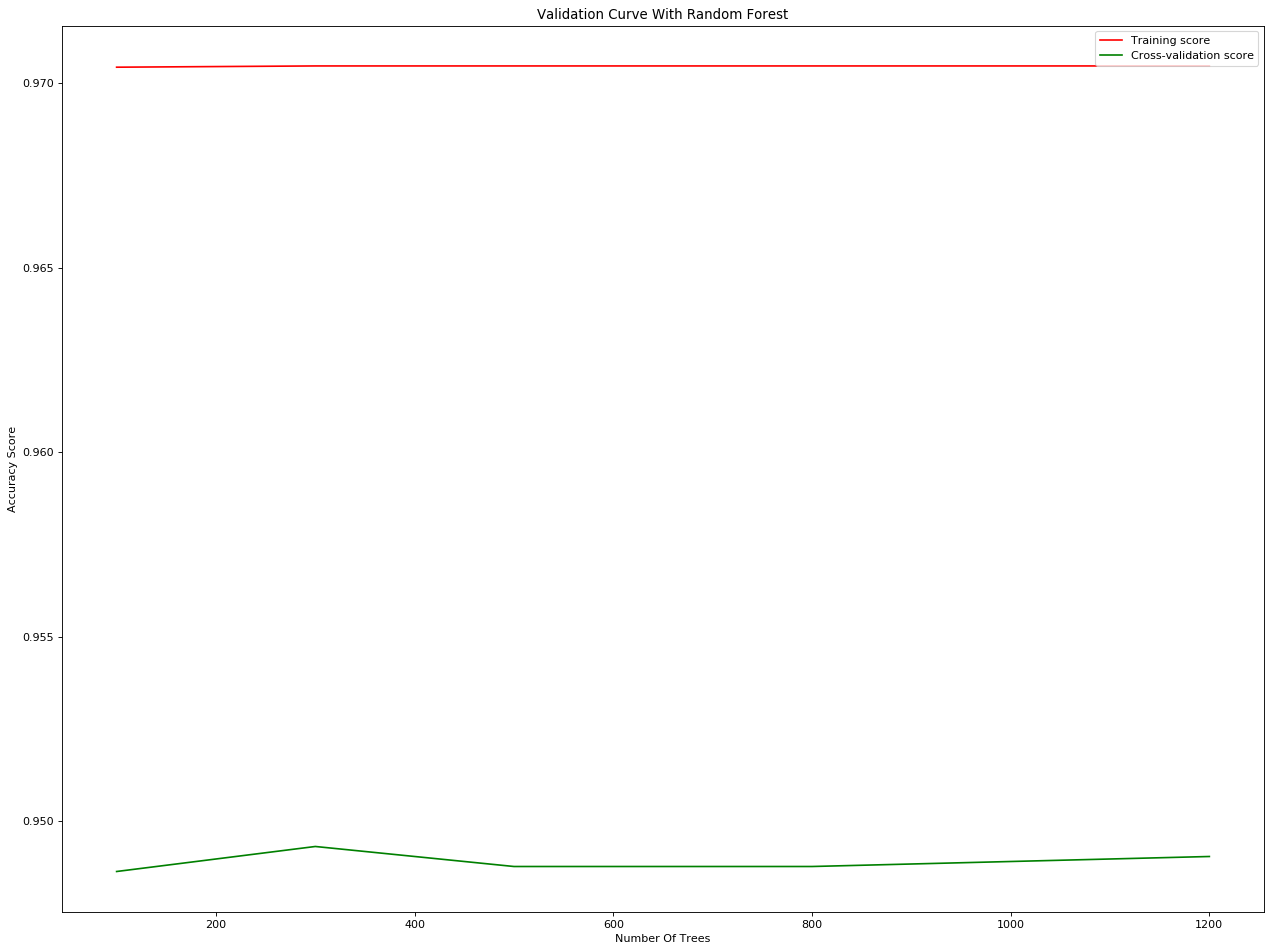

In [68]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = [100, 300, 500, 800, 1200]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

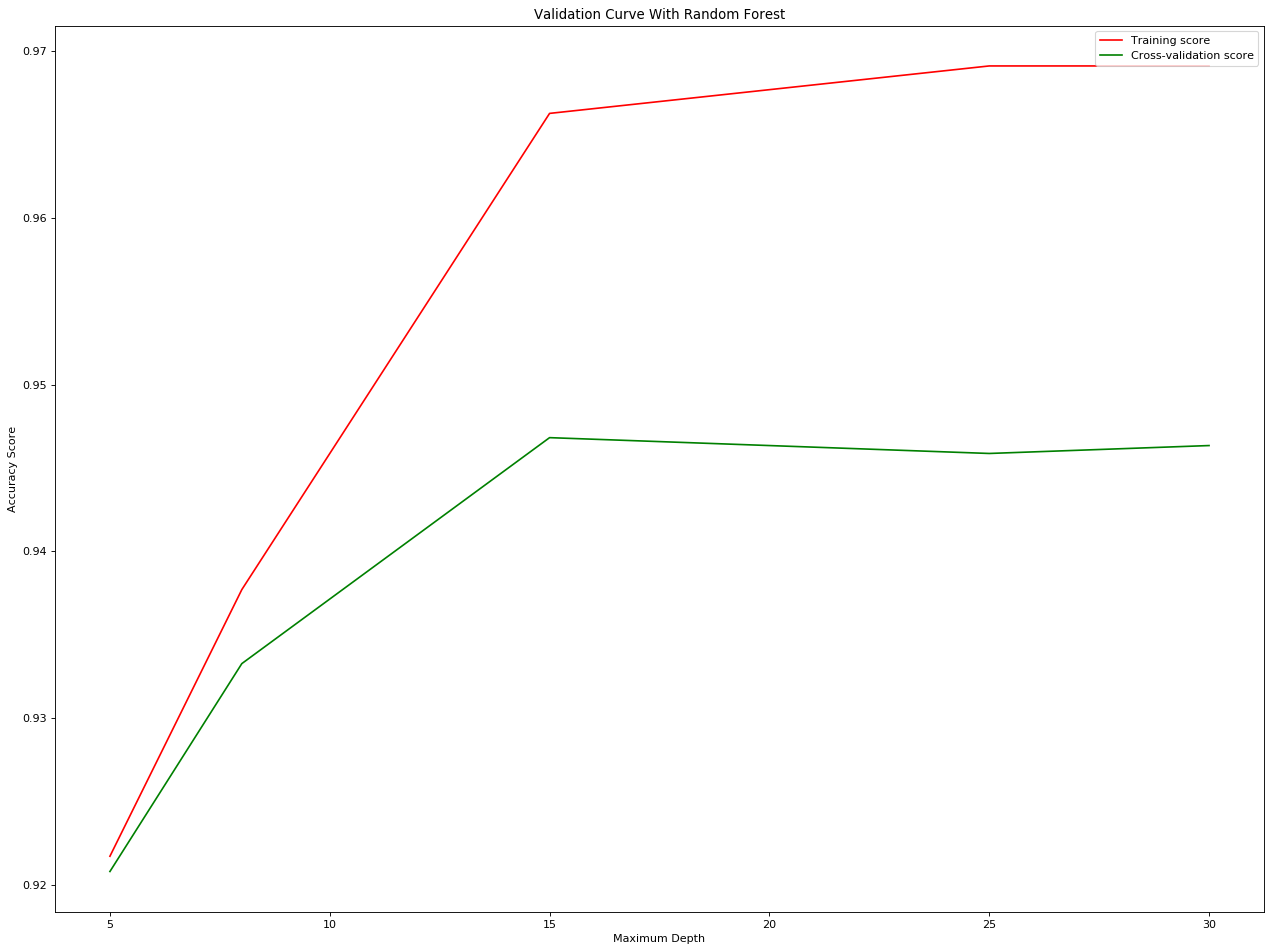

In [69]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
param_range = [5, 8, 15, 25, 30]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

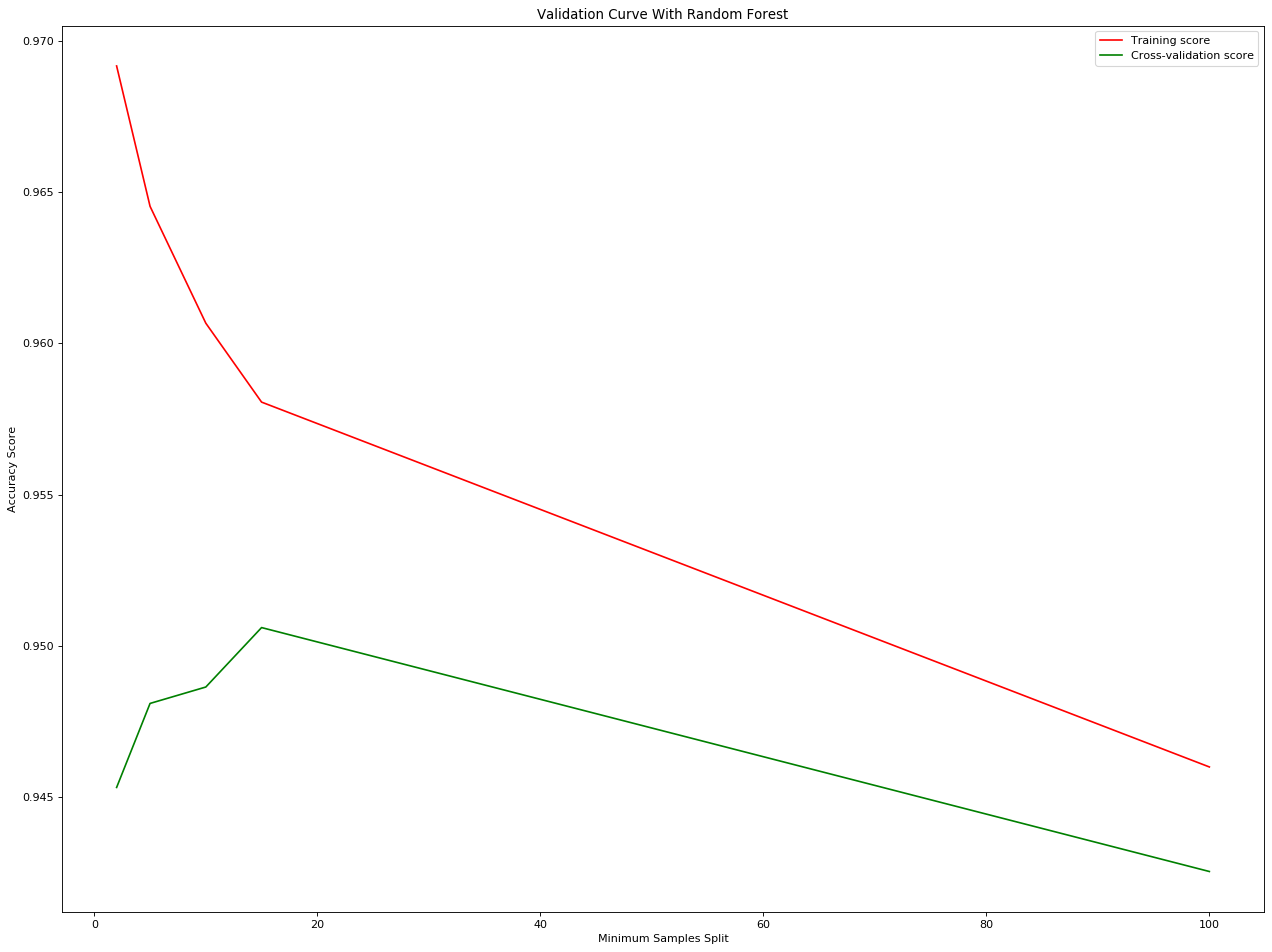

In [70]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
param_range = [2, 5, 10, 15, 100]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="min_samples_split", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Minimum Samples Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

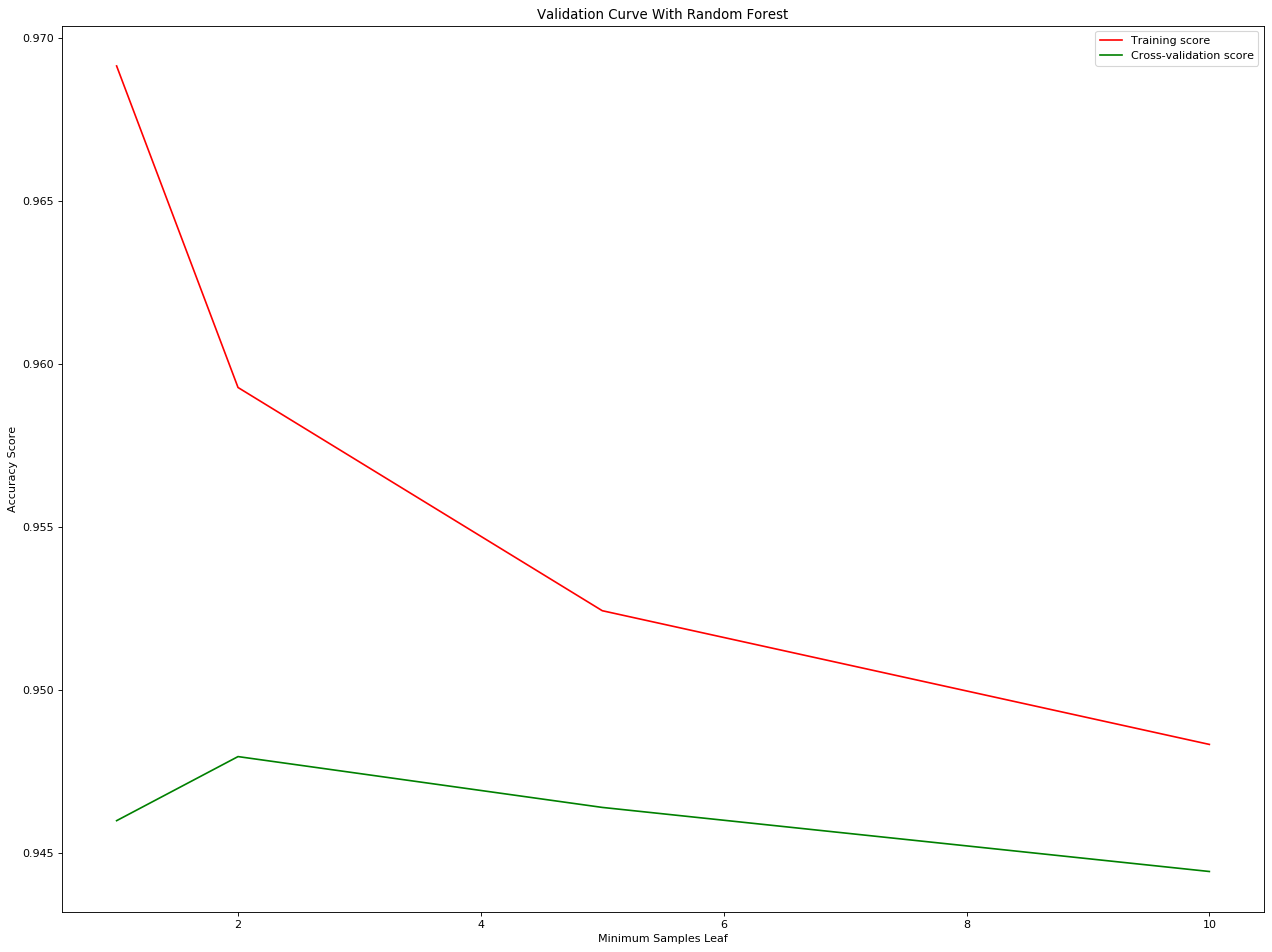

In [71]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
param_range = [1, 2, 5, 10]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="min_samples_leaf", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Minimum Samples Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

Confusion matrix, without normalization
[[2834   50]
 [ 134  673]]


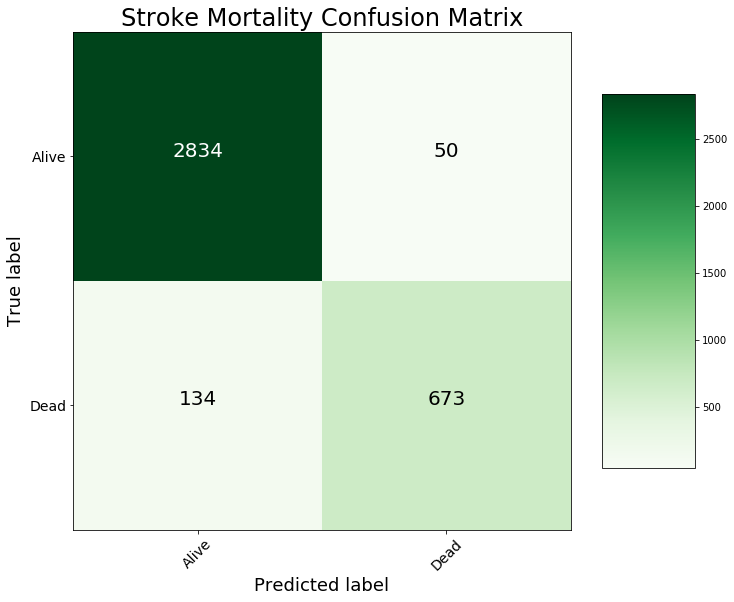

In [72]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(y_test, y_predrfc)
plot_confusion_matrix(cm, classes = ['Alive', 'Dead'],
                      title = 'Stroke Mortality Confusion Matrix')

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predrfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2884
           1       0.93      0.83      0.88       807

    accuracy                           0.95      3691
   macro avg       0.94      0.91      0.92      3691
weighted avg       0.95      0.95      0.95      3691



Random Forest: ROC AUC=0.985


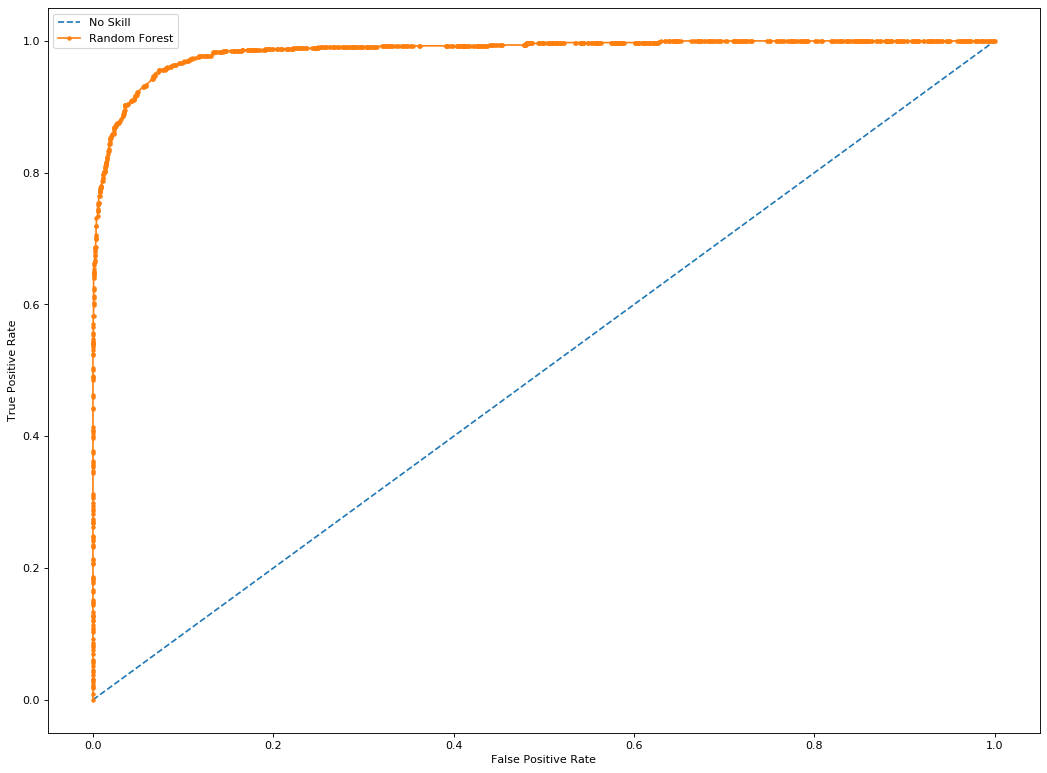

In [19]:
# roc curve and auc
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rfc_probs = modelOpt.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

Random Forest: f1=0.880 auc=0.962


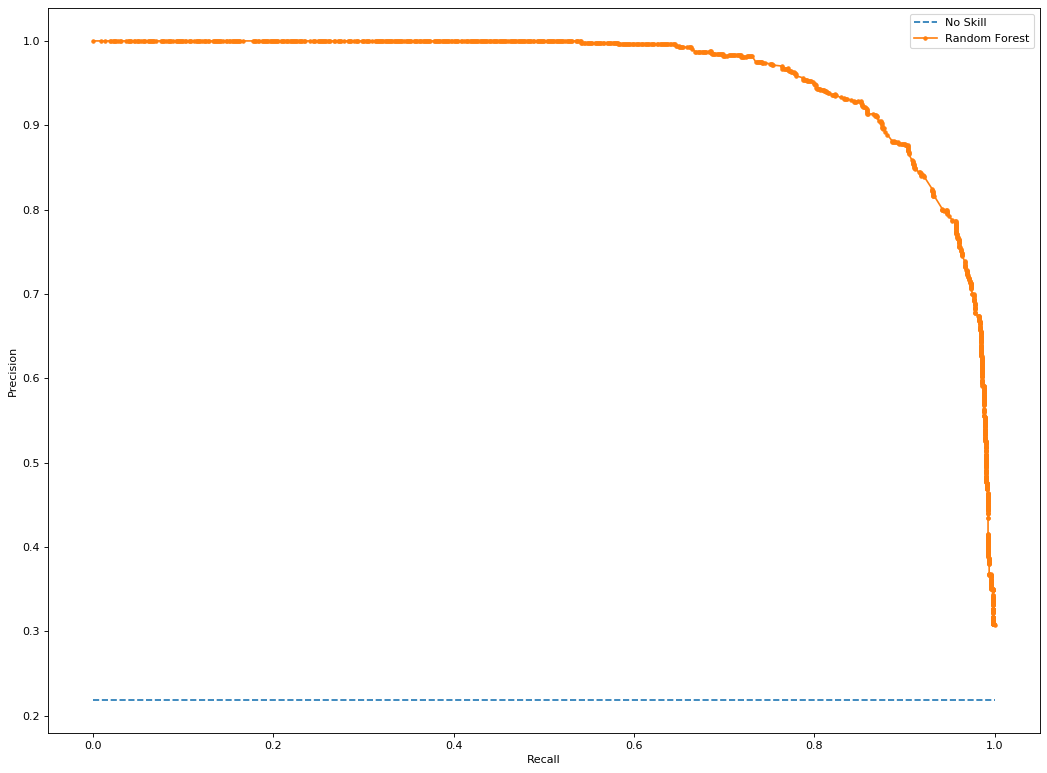

In [20]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
#precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs)
rfc_f1, rfc_auc = f1_score(y_test, y_predrfc), auc(rfc_recall, rfc_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

In [21]:
# Load libraries
from sklearn import linear_model

In [27]:
# Create logistic regression
logistic = linear_model.LogisticRegression(C=7,penalty='l2')

In [84]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=7, penalty=penalty)

In [85]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [28]:
# Fit grid search
best_model = logistic.fit(X_train_scaled, y_train)

In [89]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [90]:
best_model.best_score_

0.8915311653116531

In [29]:
y_pred_lr = best_model.predict(X_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred_lr)

0.8948794364670821

Confusion matrix, without normalization
[[2750  134]
 [ 254  553]]


NameError: name 'np' is not defined

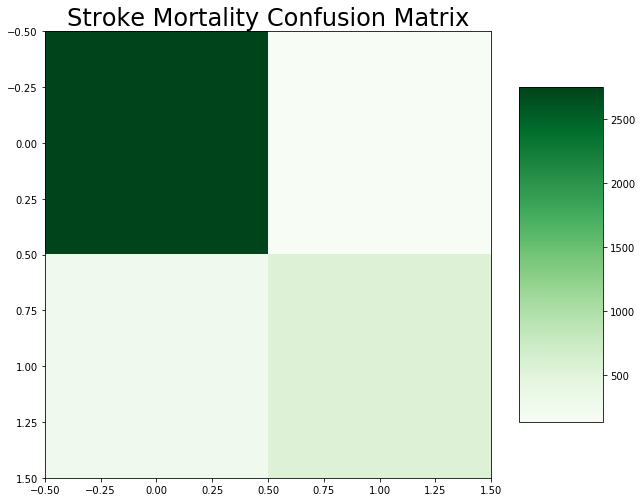

In [31]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm, classes = ['Alive', 'Dead'],
                      title = 'Stroke Mortality Confusion Matrix')

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2884
           1       0.80      0.69      0.74       807

    accuracy                           0.89      3691
   macro avg       0.86      0.82      0.84      3691
weighted avg       0.89      0.89      0.89      3691



Logistic Regression: ROC AUC=0.921


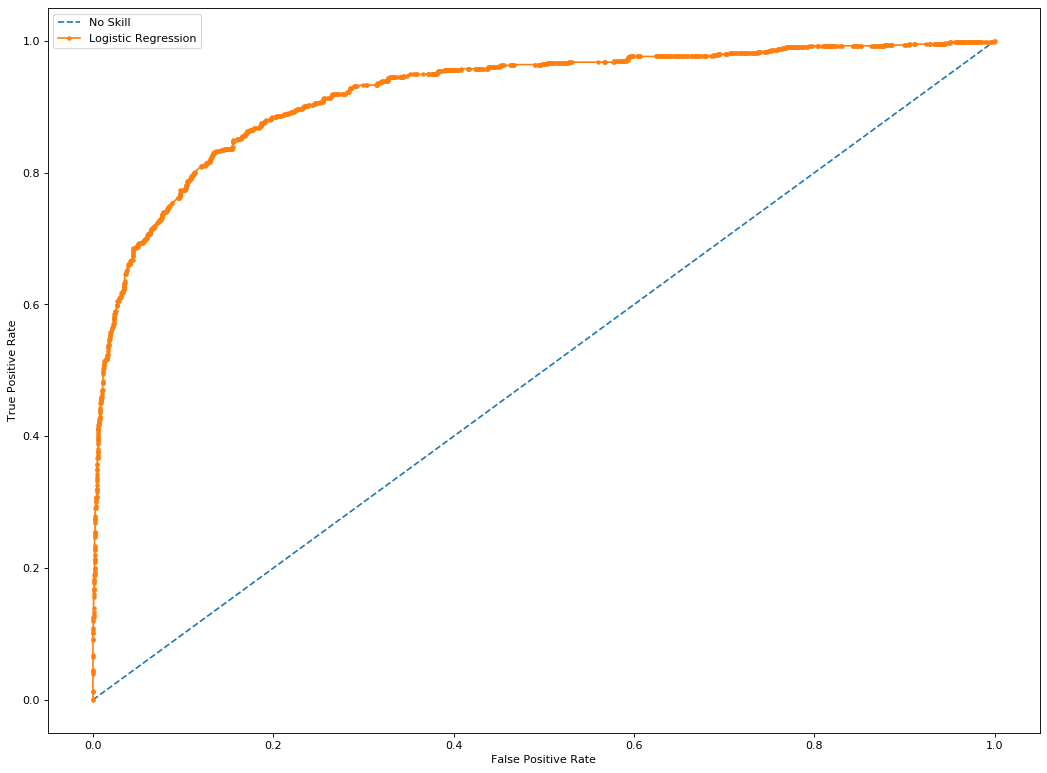

In [32]:
# roc curve and auc
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = best_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

Logistic Regression: f1=0.740 auc=0.826


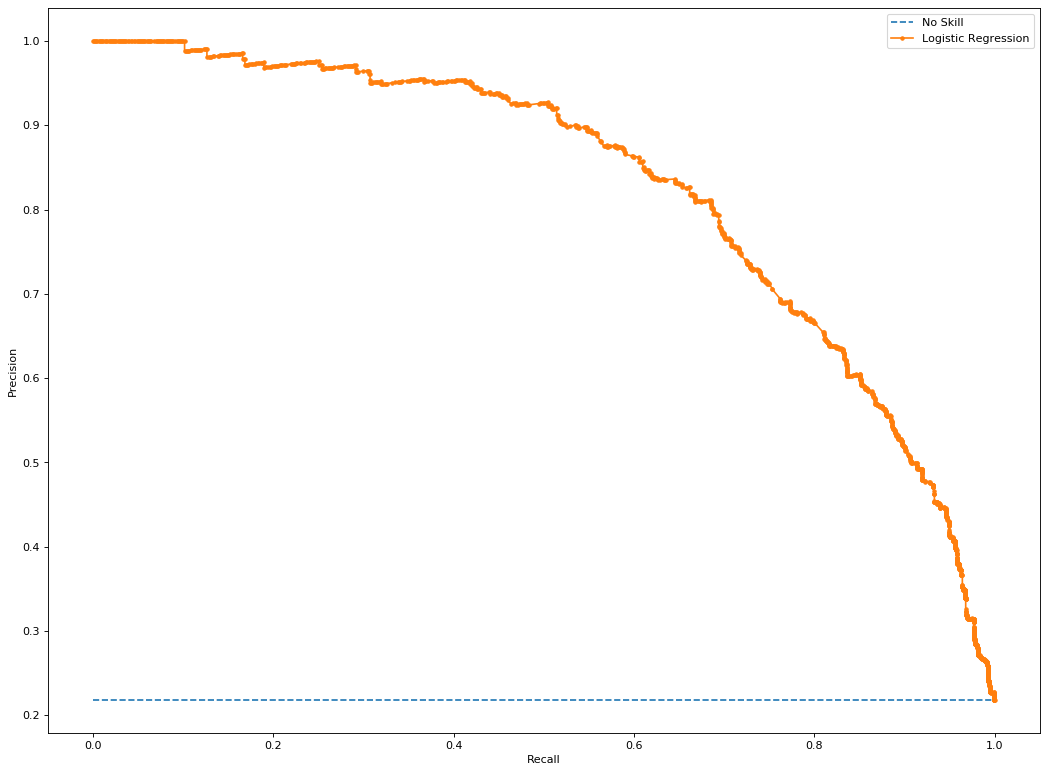

In [33]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
#precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred_lr), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

In [37]:
from sklearn.svm import SVC
# train the model on train set 
model = SVC(kernel='poly', C=1000, degree=5, probability=True) 
model.fit(X_train_scaled, y_train) 

# print prediction results 
predictions = model.predict(X_test_scaled) 

D:\Apps\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
from sklearn.svm import SVC
# train the model on train set 
model2 = SVC(kernel='rbf', C=1000, gamma=0.1, probability=True) 
model2.fit(X_train_scaled, y_train) 

# print prediction results 
predictions2 = model2.predict(X_test_scaled) 

In [39]:
from sklearn.svm import SVC
# train the model on train set 
model3 = SVC(kernel='linear',probability=True) 
model3.fit(X_train_scaled, y_train) 

# print prediction results 
predictions3 = model3.predict(X_test_scaled) 

SVM (poly): ROC AUC=0.979


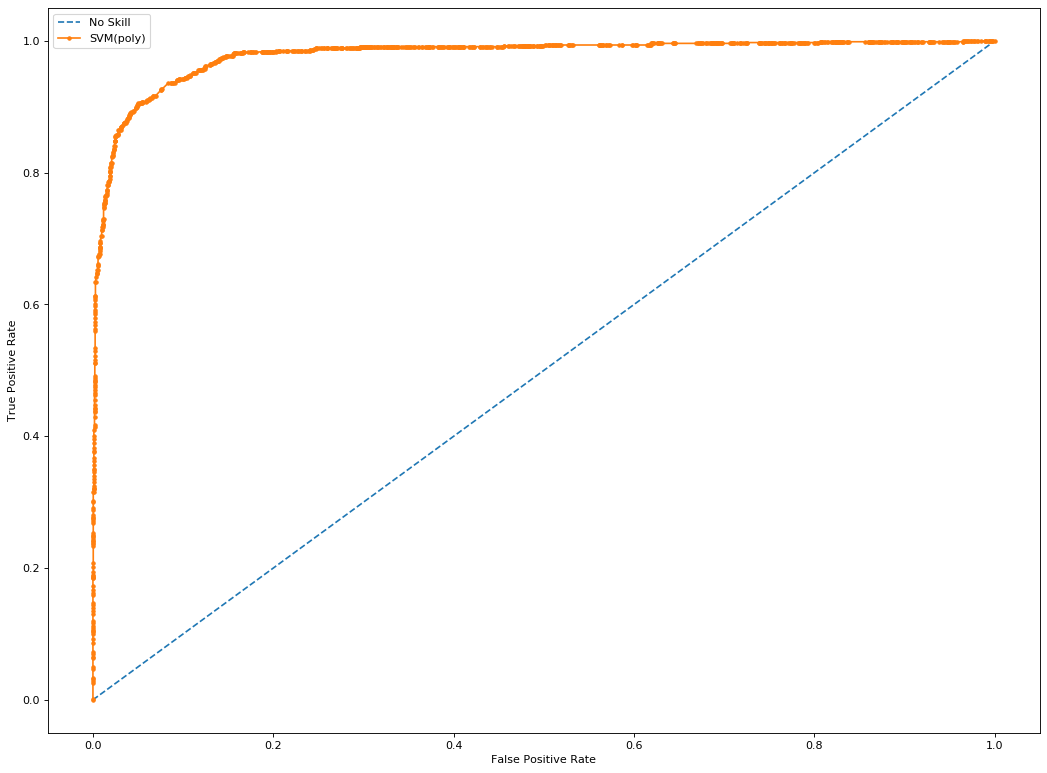

In [42]:
import numpy as np
# roc curve and auc
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rfc2_probs = model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
rfc2_probs = rfc2_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc2_auc = roc_auc_score(y_test, rfc2_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM (poly): ROC AUC=%.3f' % (rfc2_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc2_fpr, rfc2_tpr, _ = roc_curve(y_test, rfc2_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc2_fpr, rfc2_tpr, marker='.', label='SVM(poly)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

SVM(poly): f1=0.880 auc=0.962


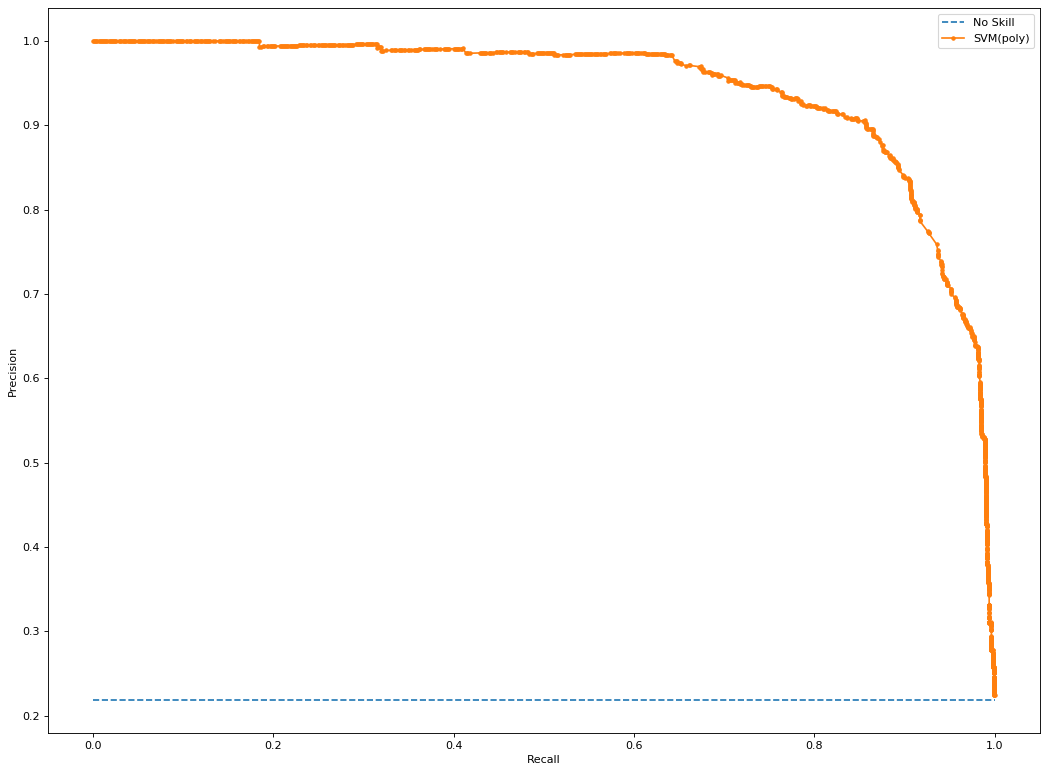

In [43]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
#precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

rfc2_precision, rfc2_recall, _ = precision_recall_curve(y_test, rfc2_probs)
rfc2_f1, rfc2_auc = f1_score(y_test, predictions), auc(rfc2_recall, rfc2_precision)
# summarize scores
print('SVM(poly): f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rfc2_recall, rfc2_precision, marker='.', label='SVM(poly)')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

SVM (rbf): ROC AUC=0.962


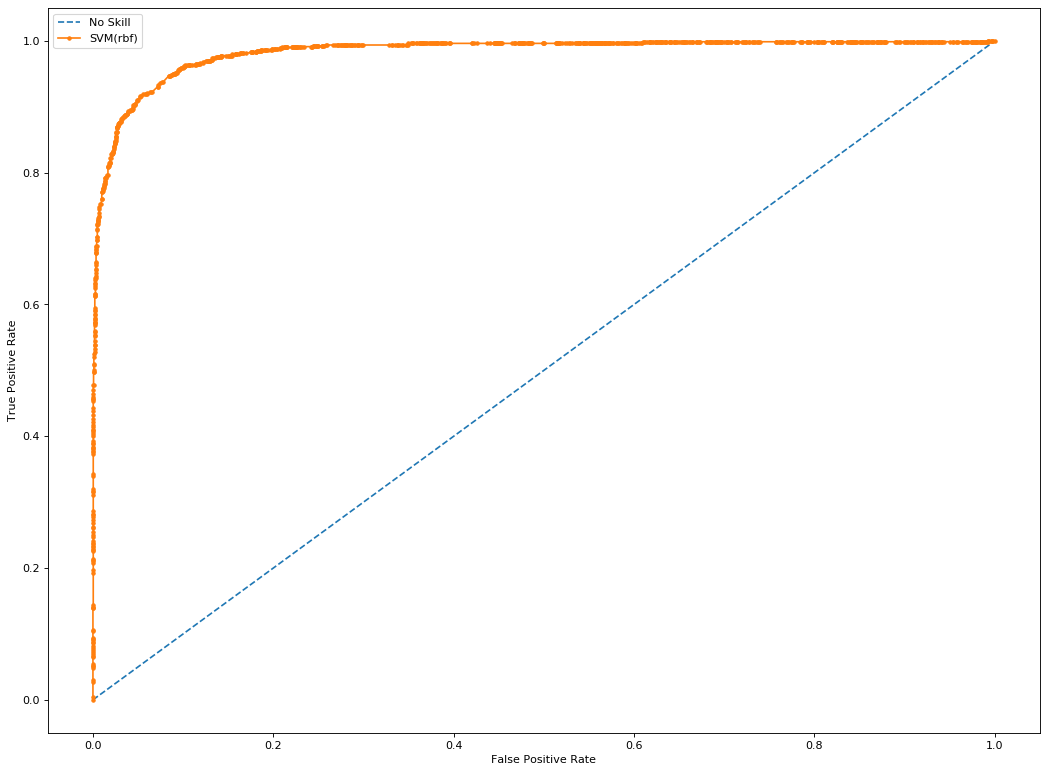

In [44]:
# roc curve and auc
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rfc4_probs = model2.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
rfc4_probs = rfc4_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc4_auc = roc_auc_score(y_test, rfc4_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM (rbf): ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc4_fpr, rfc4_tpr, _ = roc_curve(y_test, rfc4_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc4_fpr, rfc4_tpr, marker='.', label='SVM(rbf)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

SVM(rbf): f1=0.876 auc=0.953


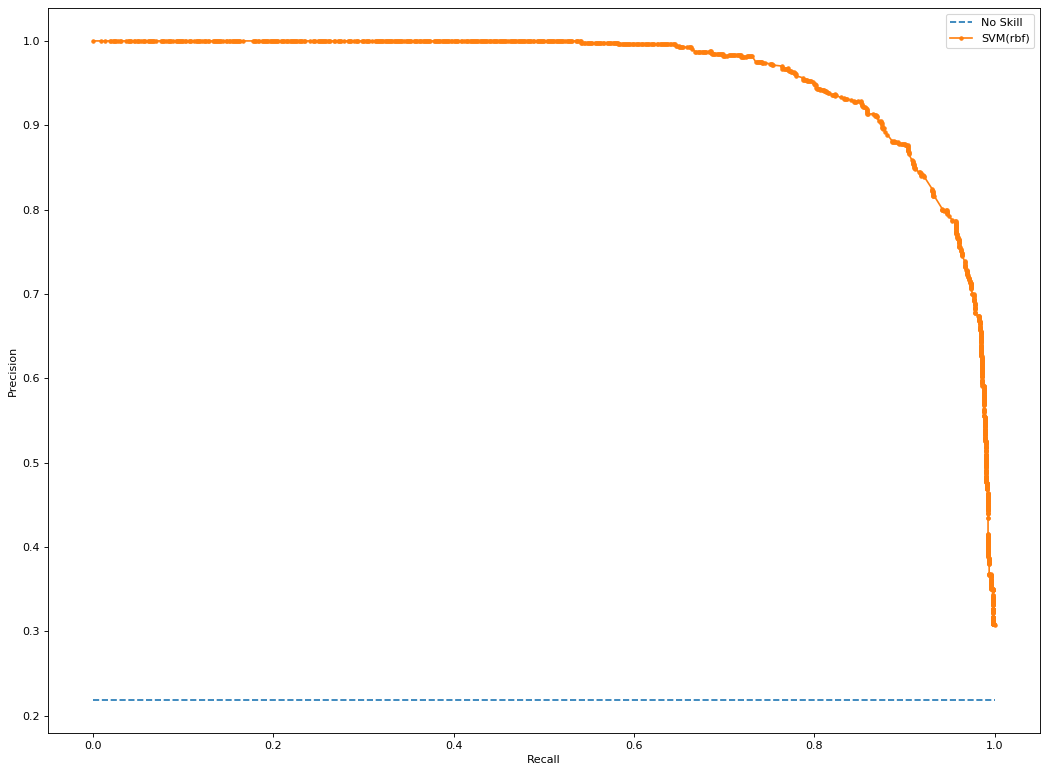

In [45]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
#precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

rfc4_precision, rfc4_recall, _ = precision_recall_curve(y_test, rfc4_probs)
rfc4_f1, rfc4_auc = f1_score(y_test, predictions2), auc(rfc4_recall, rfc4_precision)
# summarize scores
print('SVM(rbf): f1=%.3f auc=%.3f' % (rfc4_f1, rfc4_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rfc_recall, rfc_precision, marker='.', label='SVM(rbf)')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

SVM (linear): ROC AUC=0.919


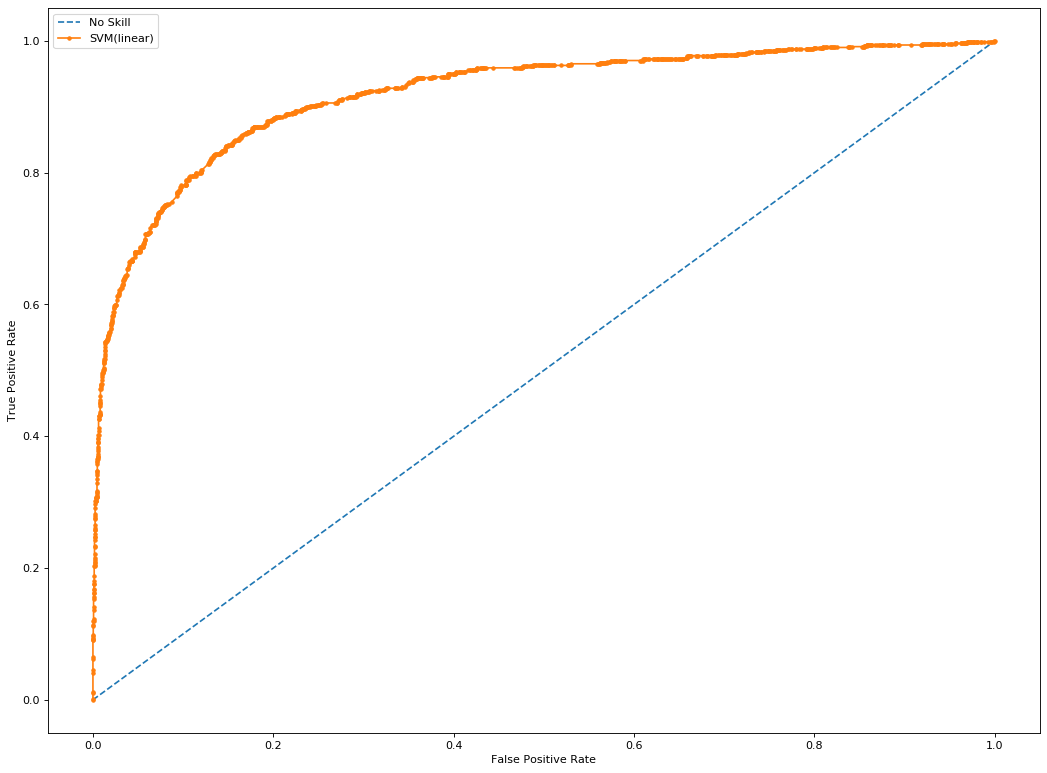

In [46]:
# roc curve and auc
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rfc3_probs = model3.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
rfc3_probs = rfc3_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc3_auc = roc_auc_score(y_test, rfc3_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM (linear): ROC AUC=%.3f' % (rfc3_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc3_fpr, rfc3_tpr, _ = roc_curve(y_test, rfc3_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc3_fpr, rfc3_tpr, marker='.', label='SVM(linear)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

SVM(rbf): f1=0.876 auc=0.953
SVM(poly): f1=0.870 auc=0.944
SVM(linear): f1=0.732 auc=0.826


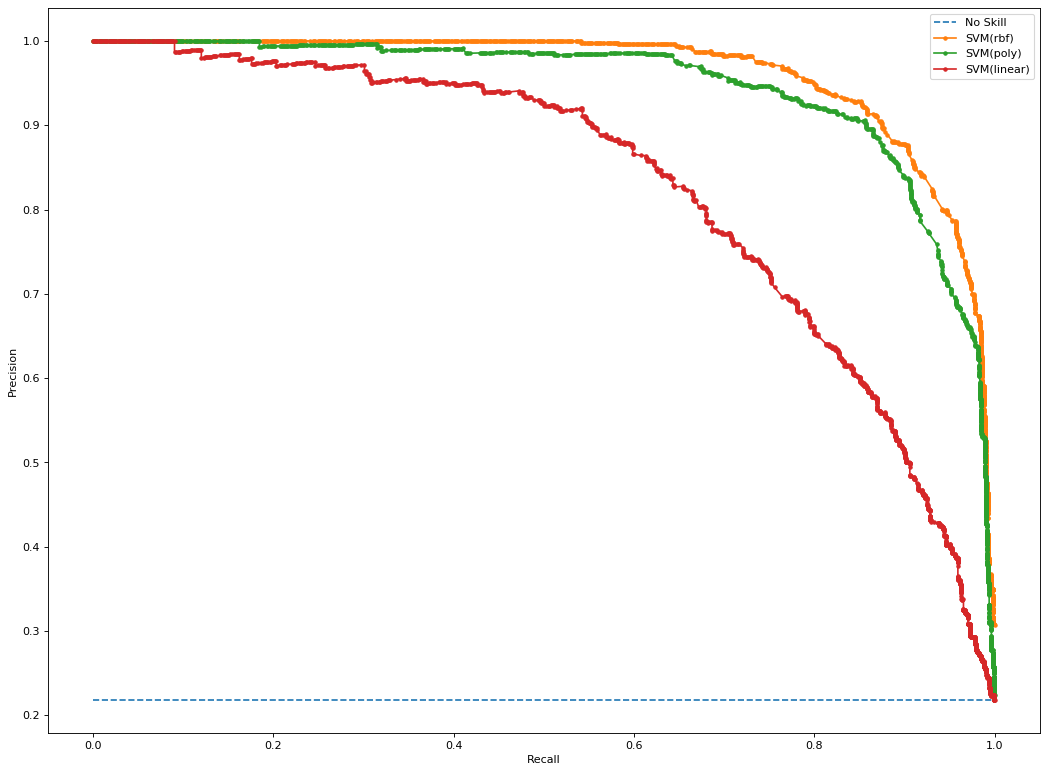

In [48]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
#precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

rfc3_precision, rfc3_recall, _ = precision_recall_curve(y_test, rfc3_probs)
rfc3_f1, rfc3_auc = f1_score(y_test, predictions3), auc(rfc3_recall, rfc3_precision)

rfc2_precision, rfc2_recall, _ = precision_recall_curve(y_test, rfc2_probs)
rfc2_f1, rfc2_auc = f1_score(y_test, predictions), auc(rfc2_recall, rfc2_precision)

rfc4_precision, rfc4_recall, _ = precision_recall_curve(y_test, rfc4_probs)
rfc4_f1, rfc4_auc = f1_score(y_test, predictions2), auc(rfc4_recall, rfc4_precision)
# summarize scores
print('SVM(rbf): f1=%.3f auc=%.3f' % (rfc4_f1, rfc4_auc))
# summarize scores
print('SVM(poly): f1=%.3f auc=%.3f' % (rfc2_f1, rfc2_auc))
print('SVM(linear): f1=%.3f auc=%.3f' % (rfc3_f1, rfc3_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rfc_recall, rfc_precision, marker='.', label='SVM(rbf)')
plt.plot(rfc2_recall, rfc2_precision, marker='.', label='SVM(poly)')
plt.plot(rfc3_recall, rfc3_precision, marker='.', label='SVM(linear)')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

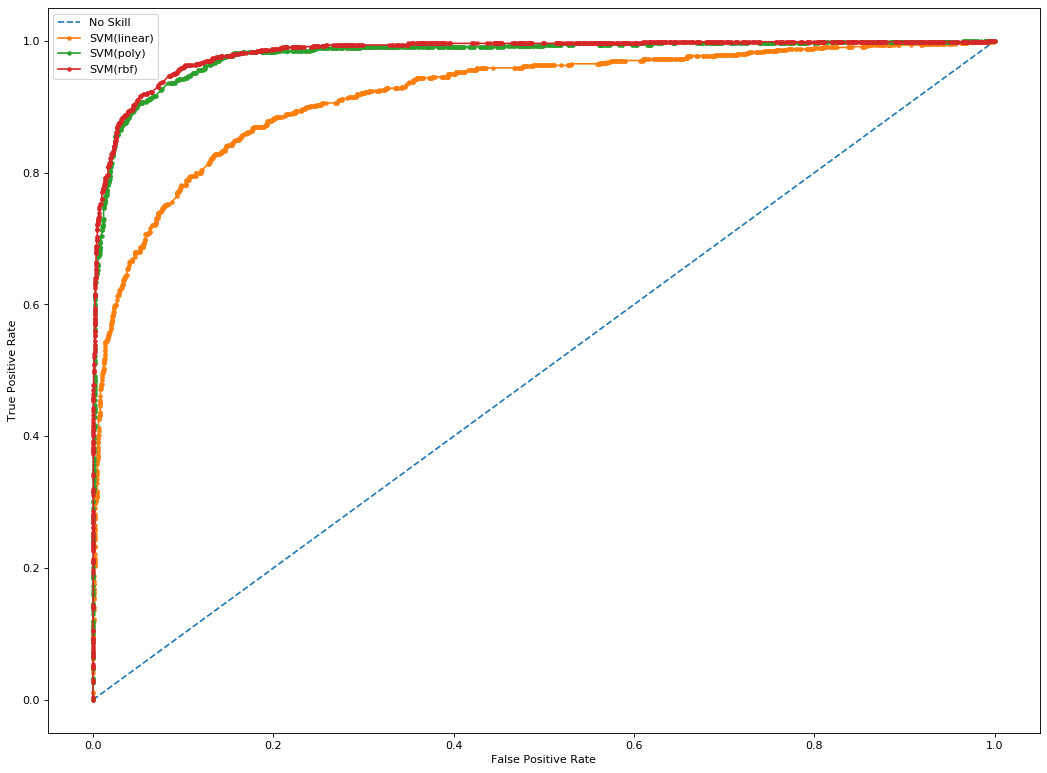

In [49]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc3_fpr, rfc3_tpr, marker='.', label='SVM(linear)')
plt.plot(rfc2_fpr, rfc2_tpr, marker='.', label='SVM(poly)')
plt.plot(rfc4_fpr, rfc4_tpr, marker='.', label='SVM(rbf)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

Logistic Regression: ROC AUC=0.921
Random Forest: ROC AUC=0.985
Kth Nearest Neighbor: ROC AUC=0.965


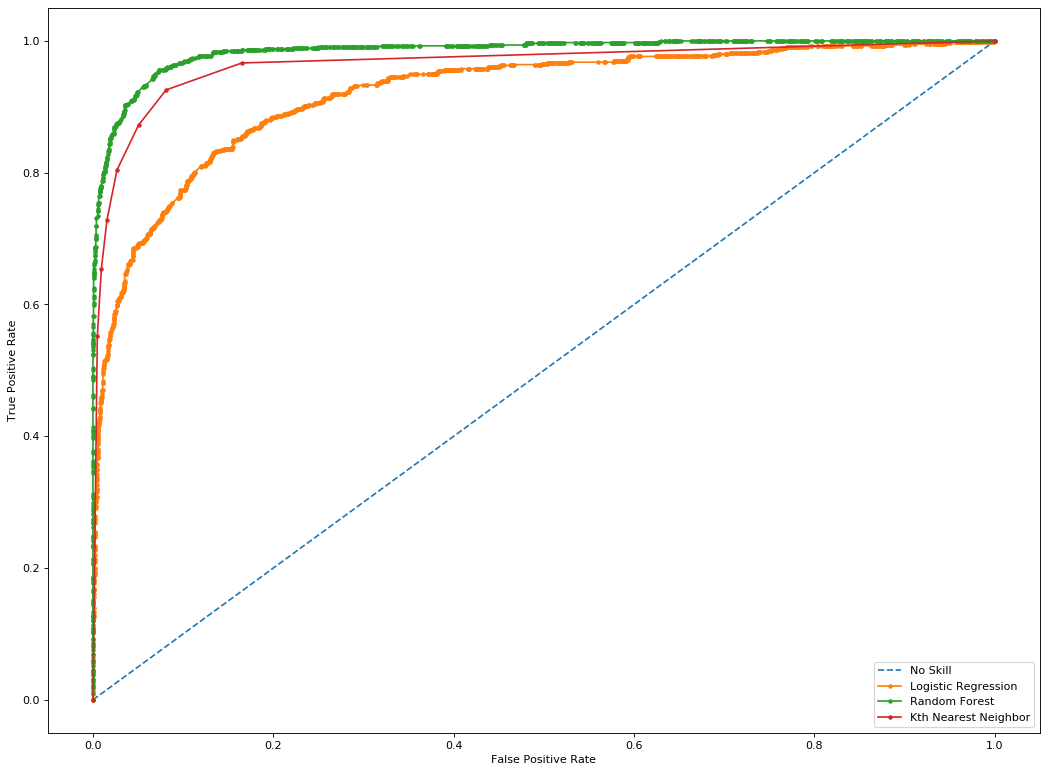

In [34]:
# roc curve and auc
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = best_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# predict probabilities
rfc_probs = modelOpt.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
# predict probabilities
knn_probs = knn_gscv_test.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Kth Nearest Neighbor: ROC AUC=%.3f' % (knn_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')

# plot the roc curve for the model
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')

# plot the roc curve for the model
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='Kth Nearest Neighbor')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

Random Forest: f1=0.880 auc=0.962
Logistic Regression: f1=0.740 auc=0.826
kth Nearest Neighbors: f1=0.847 auc=0.924


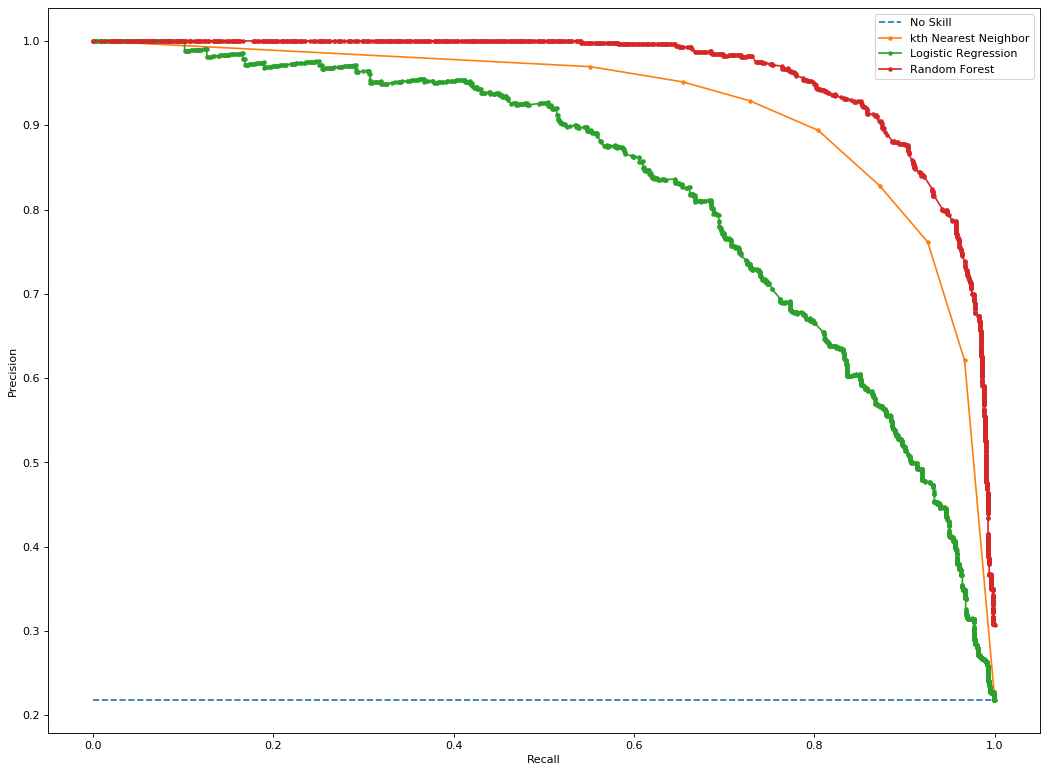

In [36]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
#precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred_lr), auc(lr_recall, lr_precision)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs)
rfc_f1, rfc_auc = f1_score(y_test, y_predrfc), auc(rfc_recall, rfc_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, y_pred_gscv), auc(knn_recall, knn_precision)
# summarize scores
print('kth Nearest Neighbors: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(knn_recall, knn_precision, marker='.', label='kth Nearest Neighbor')
# plot the precision-recall curves

#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')

#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

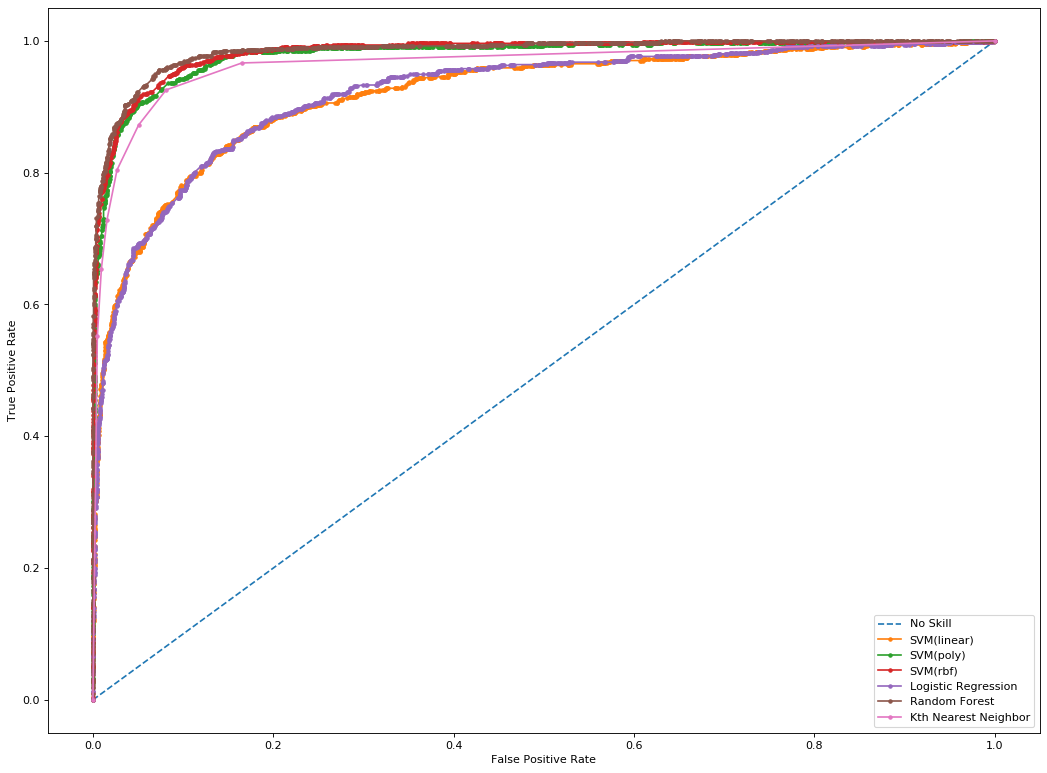

In [50]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc3_fpr, rfc3_tpr, marker='.', label='SVM(linear)')
plt.plot(rfc2_fpr, rfc2_tpr, marker='.', label='SVM(poly)')
plt.plot(rfc4_fpr, rfc4_tpr, marker='.', label='SVM(rbf)')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')
plt.plot(knn_fpr, knn_tpr, marker='.', label='Kth Nearest Neighbor')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

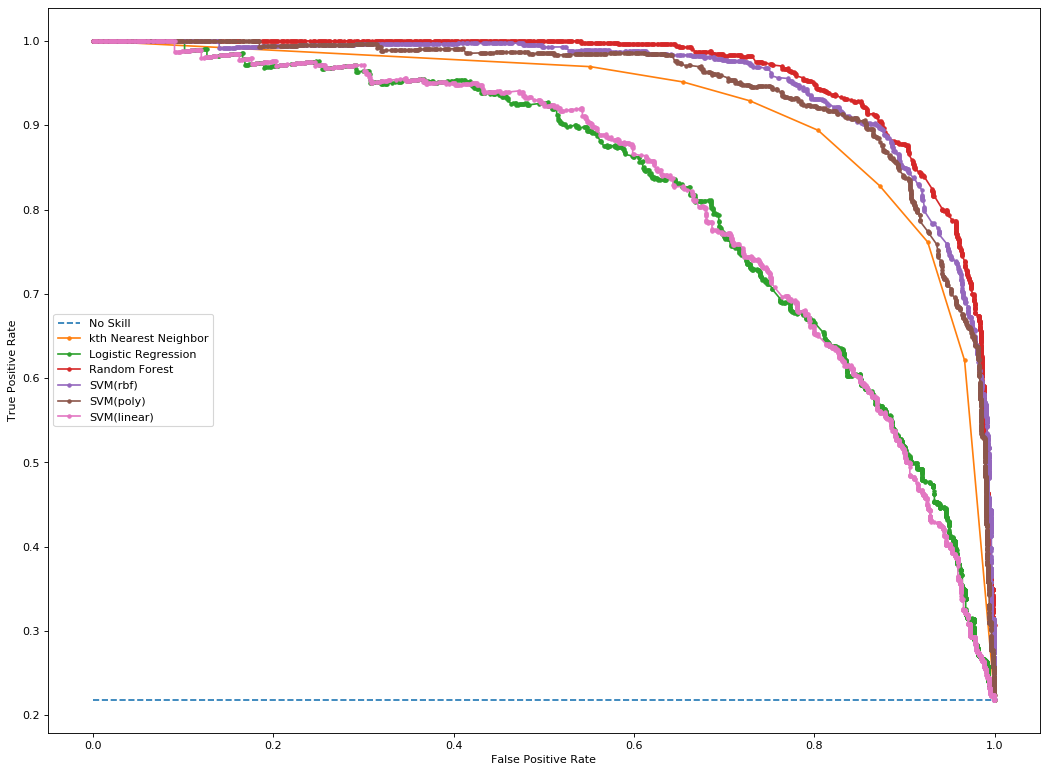

In [52]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(knn_recall, knn_precision, marker='.', label='kth Nearest Neighbor')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
plt.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest')
plt.plot(rfc4_recall, rfc4_precision, marker='.', label='SVM(rbf)')
plt.plot(rfc2_recall, rfc2_precision, marker='.', label='SVM(poly)')
plt.plot(rfc3_recall, rfc3_precision, marker='.', label='SVM(linear)')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2884
           1       0.91      0.83      0.87       807

    accuracy                           0.95      3691
   macro avg       0.93      0.90      0.92      3691
weighted avg       0.94      0.95      0.94      3691



In [55]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2884
           1       0.91      0.85      0.88       807

    accuracy                           0.95      3691
   macro avg       0.93      0.91      0.92      3691
weighted avg       0.95      0.95      0.95      3691



In [56]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2884
           1       0.81      0.67      0.73       807

    accuracy                           0.89      3691
   macro avg       0.86      0.81      0.83      3691
weighted avg       0.89      0.89      0.89      3691

